In [1]:
#Dataset yang digunakan berisi dua file utama:
#hour.csv: Data penyewaan sepeda per jam.
#day.csv: Data penyewaan sepeda per hari.
#Setiap baris berisi informasi seperti tanggal, musim, suhu, kecepatan angin, dan jumlah penyewaan sepeda baik untuk pengguna baru (casual) maupun pengguna terdaftar (registered).

In [2]:
#menganalisis statistik deskriptif dari dataset untuk mendapatkan gambaran umum tentang data. Ini mencakup analisis nilai rata-rata, median, standar deviasi, serta distribusi data.

In [3]:
import pandas as pd

# Membaca data
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

# Statistik deskriptif untuk data per jam
hour_data.describe()

# Statistik deskriptif untuk data per hari
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
#Cek apakah ada nilai yang hilang (missing values).
#Cek apakah ada duplikasi dalam data dan lakukan pembersihan jika perlu.
#Pastikan semua kolom memiliki tipe data yang tepat.

In [5]:
# Cek missing values
hour_data.isnull().sum()

# Cek duplikasi
hour_data.duplicated().sum()

# Memastikan tipe data
hour_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#Data Wrangling
#Lakukan penggabungan kolom atau perubahan format kolom jika perlu. Misalnya, mengubah tanggal menjadi format datetime.
#Gabungkan data jika ingin melihat perbandingan antara data per jam dan per hari.

In [7]:
# Mengonversi kolom 'dteday' menjadi datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [8]:
#Exploratory Data Analysis (EDA)
#Lakukan visualisasi untuk mengeksplorasi pola dalam data seperti penyewaan sepeda berdasarkan musim, suhu, dan kecepatan angin.

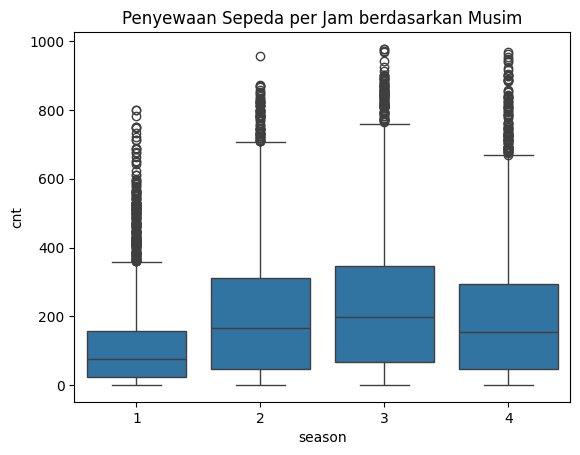

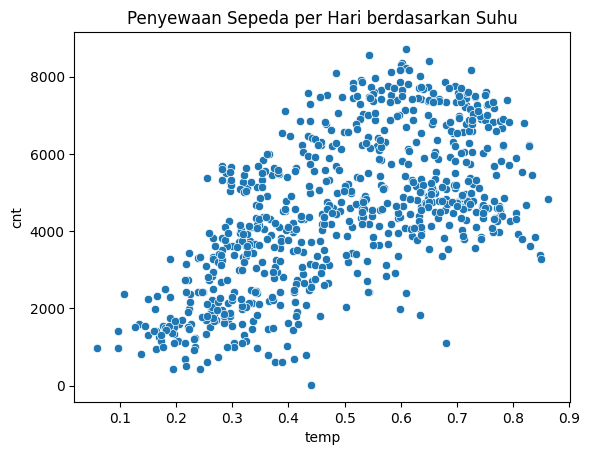

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi penyewaan sepeda per jam berdasarkan musim
sns.boxplot(x='season', y='cnt', data=hour_data)
plt.title('Penyewaan Sepeda per Jam berdasarkan Musim')
plt.show()

# Visualisasi penyewaan sepeda per hari berdasarkan suhu
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Penyewaan Sepeda per Hari berdasarkan Suhu')
plt.show()

In [ ]:
#Data Visualization
#Gunakan grafik dan visualisasi untuk mengidentifikasi tren atau pola lebih lanjut, seperti:
#Bar chart untuk jumlah penyewaan sepeda berdasarkan hari.
#Line chart untuk tren penyewaan sepeda sepanjang waktu.
#Heatmap untuk menunjukkan hubungan antara variabel seperti suhu, kelembaban, dan kecepatan angin.

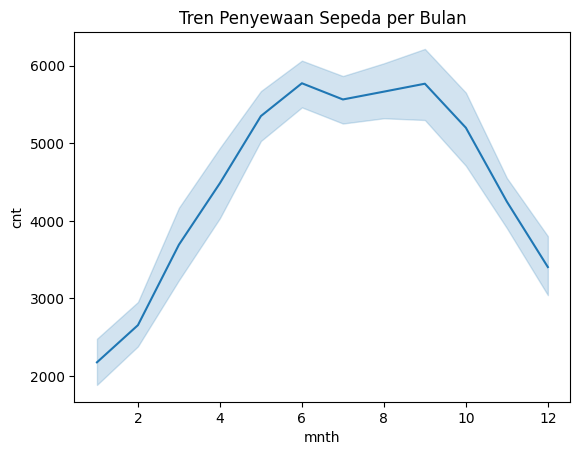

In [11]:
# Visualisasi tren penyewaan sepeda berdasarkan bulan
sns.lineplot(x='mnth', y='cnt', data=day_data)
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.show()

In [13]:
#RFM Analysis
#RFM analysis adalah metode untuk mengelompokkan pengguna berdasarkan tiga faktor:

#Recency: Berapa lama sejak pengguna terakhir kali menyewa sepeda.
#Frequency: Seberapa sering pengguna menyewa sepeda.
#Monetary: Berapa banyak uang yang dibelanjakan oleh pengguna.
#Untuk analisis ini, kita akan menggunakan data dari casual dan registered untuk mengukur Frequency dan Monetary.

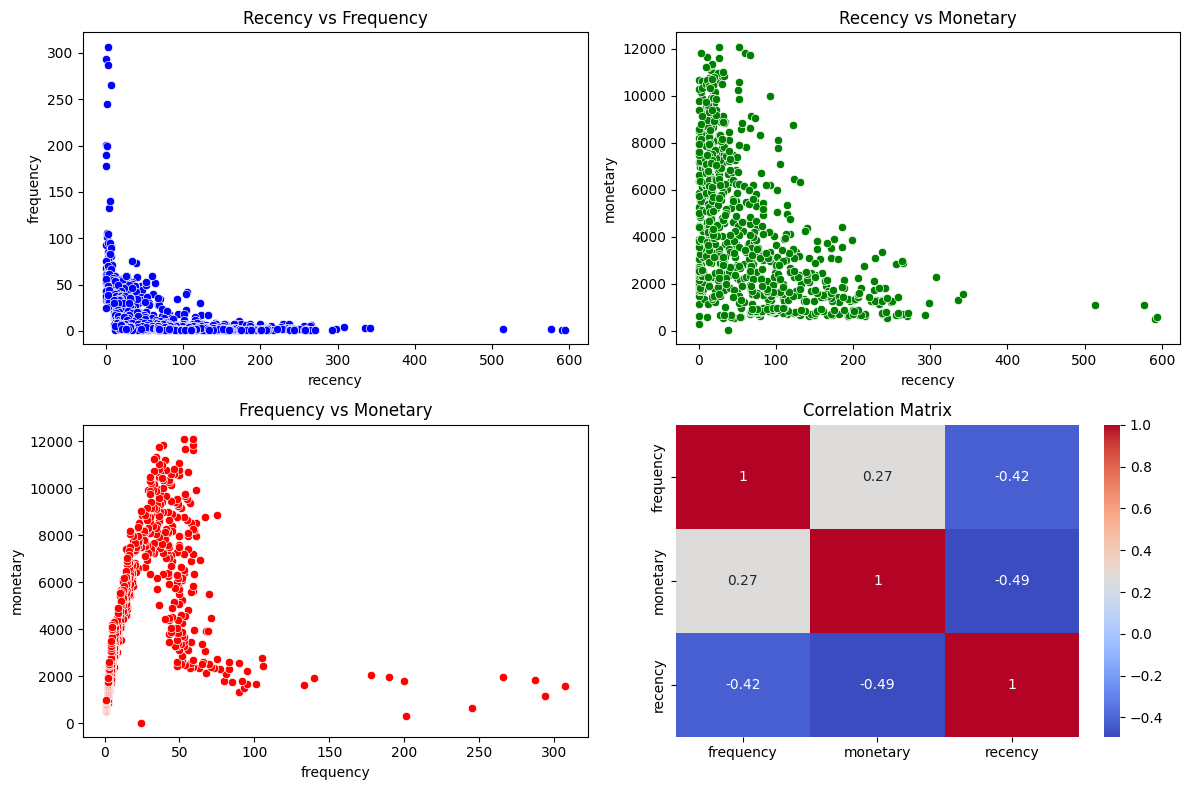

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Pastikan 'hour_data' sudah di-load dan 'dteday' sudah dalam format datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Hitung recency (jumlah hari sejak penyewaan terakhir)
last_purchase_date = hour_data['dteday'].max()
hour_data['recency'] = (last_purchase_date - hour_data['dteday']).dt.days

# Hitung Frequency (jumlah transaksi per pengguna)
frequency = hour_data.groupby('registered')['cnt'].count()

# Hitung Monetary (total penyewaan per pengguna)
monetary = hour_data.groupby('registered')['cnt'].sum()

# Gabungkan semua metrik menjadi DataFrame
rfm_data = pd.DataFrame({
    'frequency': frequency,
    'monetary': monetary,
})
rfm_data['recency'] = hour_data.groupby('registered')['recency'].min()

# Visualisasi RFM Analysis
plt.figure(figsize=(12, 8))

# Scatter plot untuk hubungan Recency dan Frequency
plt.subplot(2, 2, 1)
sns.scatterplot(x='recency', y='frequency', data=rfm_data, color='blue')
plt.title('Recency vs Frequency')

# Scatter plot untuk hubungan Recency dan Monetary
plt.subplot(2, 2, 2)
sns.scatterplot(x='recency', y='monetary', data=rfm_data, color='green')
plt.title('Recency vs Monetary')

# Scatter plot untuk hubungan Frequency dan Monetary
plt.subplot(2, 2, 3)
sns.scatterplot(x='frequency', y='monetary', data=rfm_data, color='red')
plt.title('Frequency vs Monetary')

# Heatmap untuk korelasi antara Recency, Frequency, dan Monetary
plt.subplot(2, 2, 4)
sns.heatmap(rfm_data.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()


In [16]:
#Geospatial Analysis
#Jika dataset berisi data lokasi (misalnya, koordinat tempat penyewaan sepeda), kita dapat menggunakan analisis spasial untuk menggambarkan distribusi penyewaan sepeda. Contohnya, kita dapat menggunakan Folium untuk membuat peta interaktif.

In [33]:
import folium

# Menentukan latitude dan longitude untuk lokasi Jakarta, Indonesia
latitude = -6.2088  # Latitude untuk Jakarta
longitude = 106.8456  # Longitude untuk Jakarta

# Membuat peta yang terpusat pada lokasi Jakarta
map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Menambahkan CircleMarker di lokasi yang ditentukan
folium.CircleMarker(location=[latitude, longitude], radius=10, color="blue").add_to(map)

# Menampilkan peta
map

In [34]:
#Clustering
#Tanpa menggunakan algoritma machine learning, kita dapat menerapkan manual grouping atau binning untuk mengelompokkan data. Misalnya, kita bisa mengelompokkan penyewa berdasarkan usia atau jumlah penyewaan.

   cnt rental_group
0   16          Low
1   40          Low
2   32          Low
3   13          Low
4    1          Low


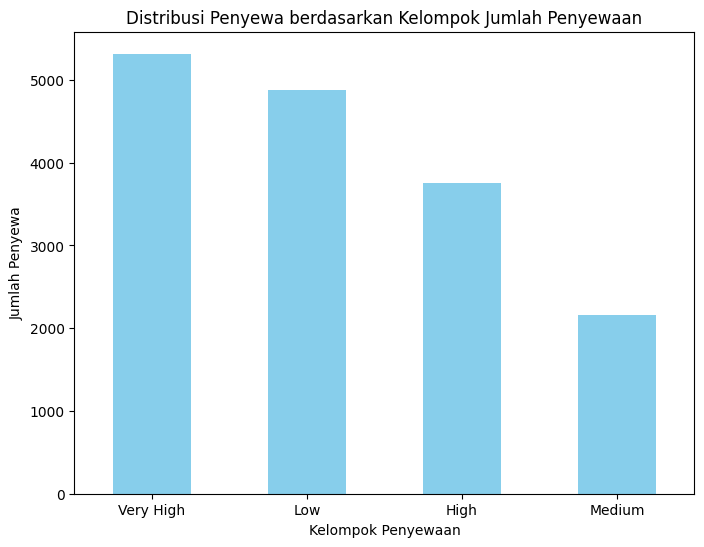

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan 'hour_data' adalah DataFrame yang sudah ada
# Binning untuk mengelompokkan penyewa berdasarkan jumlah penyewaan (cnt)
bins = [0, 50, 100, 200, 500]
labels = ['Low', 'Medium', 'High', 'Very High']
hour_data['rental_group'] = pd.cut(hour_data['cnt'], bins=bins, labels=labels)

# Menampilkan beberapa baris pertama untuk memastikan kolom baru ditambahkan
print(hour_data[['cnt', 'rental_group']].head())

# Visualisasi distribusi penyewa berdasarkan kelompok
plt.figure(figsize=(8, 6))
hour_data['rental_group'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Penyewa berdasarkan Kelompok Jumlah Penyewaan')
plt.xlabel('Kelompok Penyewaan')
plt.ylabel('Jumlah Penyewa')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Kesimpulan dan Rekomendasi:
#1. Pelanggan dengan frekuensi penyewaan tinggi dan pengeluaran tinggi adalah kelompok yang paling bernilai bagi bisnis. Oleh karena itu, pelanggan ini harus diprioritaskan dalam strategi pemasaran dan retensi.
#2. Pelanggan yang memiliki recency rendah, tetapi dengan frekuensi tinggi dan pengeluaran tinggi, bisa ditargetkan dengan kampanye pemasaran atau insentif untuk kembali melakukan penyewaan.
#3. Segmen pelanggan yang lebih jarang menyewa namun menghabiskan banyak uang bisa dipandang sebagai pelanggan musiman yang dapat ditargetkan dengan promosi atau layanan khusus pada waktu-waktu tertentu.
#4. Dashboard interaktif memberikan akses yang mudah untuk memahami dan memvisualisasikan data yang diperoleh, memungkinkan tim untuk membuat keputusan berbasis data yang lebih baik.
#Rekomendasi Selanjutnya:
#1. Lakukan analisis lebih lanjut dengan menggunakan analisis geospasial untuk memahami distribusi penyewaan sepeda berdasarkan lokasi, yang dapat membantu dalam pengelolaan armada sepeda secara lebih efisien.
#2. Terapkan segmentasi pelanggan lebih lanjut berdasarkan hasil RFM untuk menyesuaikan strategi pemasaran dan meningkatkan retensi pelanggan.
#3. Gunakan hasil dari analisis RFM untuk membangun program loyalitas yang memprioritaskan pelanggan dengan pengeluaran tinggi dan frekuensi tinggi.